In [3]:
import sys

sys.path.insert(0, '../../../')
from aqua import Reader
sys.path.insert(0, '../')
from cdotesting import *
from index import *
from plots import *
from tools import *

diagname  = 'teleconnections'
machine   = 'levante'

config   = load_config(machine,configdir='../../../config/')
namelist = load_namelist(diagname,configdir='../')

## NAO test

With `ret_diff=False` (default value), performs an `xarray.testing.assert_allclose()`, so that an `Assert` is raised if the difference is bigger than the request one.
If `ret_diff=True` an xarray containing the time serie of the difference between the two values is returned.

In [5]:
telecname = 'NAO'
infile   = config[diagname][telecname]['testfile']

In [6]:
cdo_station_based_comparison(infile,namelist,telecname,rtol=1.e-4,atol=1.e-4,ret_diff=False)

AssertionError: Left and right DataArray objects are not close

Coordinates only on the left object:
    step        (time) timedelta64[ns] 00:00:00 00:00:00 ... 00:00:00 00:00:00
    valid_time  (time) datetime64[ns] dask.array<chunksize=(82,), meta=np.ndarray>
    surface     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    number      (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

/work/users/mnurisso/mambaforge/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


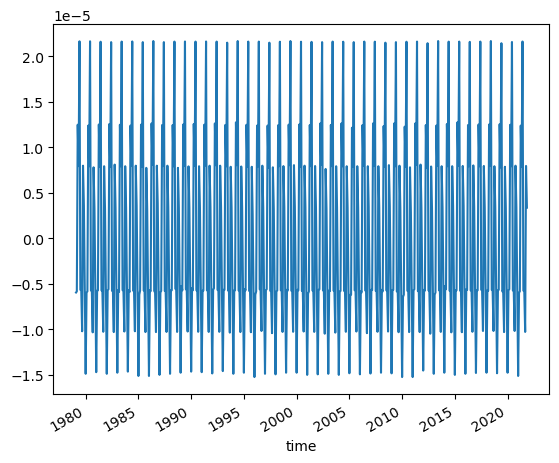

In [4]:
nao_diff = cdo_station_based_comparison(infile,namelist,telecname,rtol=1.e-4,atol=1.e-4,ret_diff=True)
nao_diff.plot()

## ENSO test

In [5]:
telecname = 'ENSO'
infile   = config[diagname][telecname]['input']
print(infile)

/work/datasets/obs/ERA5/skin_temperature/mon/ERA5_skin_temperature_mon_0.25x0.25_sfc_1979-2019.nc


In [6]:
cdo_regional_mean_comparison(infile,namelist,telecname,rtol=1.e-4,atol=1.e-4,ret_diff=False)

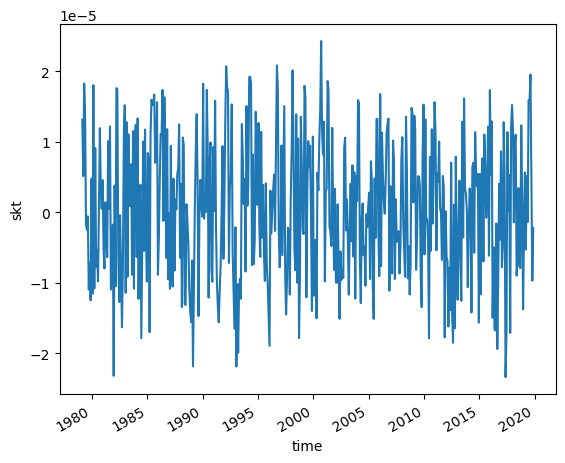

In [7]:
enso_diff = cdo_regional_mean_comparison(infile,namelist,telecname,ret_diff=True)
enso_diff.plot()